In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
import matplotlib.pyplot as plt
import numpy as np
import csv
import string
import graphviz
import pydot

In [ ]:
import pandas as pd

In [ ]:
training = '/content/sign_mnist_train.csv'

In [ ]:
validation = '//content/sign_mnist_test.csv'

In [ ]:
# Parsing the dataset
def parse_data(filename):
    with open(filename) as file:
        csv_reader = csv.reader(file, delimiter=',')
        labels = []
        images = []
        next(csv_reader, None)
        for row in csv_reader:
            label = row[0]
            image = row[1:]
            image = np.array(image).reshape((28, 28))

            labels.append(label)
            images.append(image)

        images = np.array(images).astype(float)
        labels = np.array(labels).astype(float)
    return images, labels

In [ ]:
training_images, training_labels = parse_data(training)
validation_images, validation_labels = parse_data(validation)

In [ ]:
print(training_images)

[[[107. 118. 127. ... 170. 170. 169.]
  [111. 121. 129. ... 171. 171. 170.]
  [113. 123. 131. ... 171. 171. 171.]
  ...
  [142. 150. 159. ... 202. 201. 200.]
  [142. 151. 160. ... 204. 203. 202.]
  [142. 151. 160. ... 204. 203. 202.]]

 [[155. 157. 156. ... 138.  92. 108.]
  [158. 159. 159. ... 142. 116. 143.]
  [161. 161. 161. ... 147. 125. 140.]
  ...
  [162. 159. 145. ...  91. 101.  94.]
  [153. 139. 115. ...  97.  95. 120.]
  [135. 116.  95. ... 103. 135. 149.]]

 [[187. 188. 188. ...  66.  77.  83.]
  [188. 189. 189. ...  73.  73.  71.]
  [190. 190. 190. ...  74.  68.  61.]
  ...
  [212. 198. 175. ... 195. 193. 192.]
  [202. 179. 152. ... 195. 194. 193.]
  [198. 166. 132. ... 195. 194. 195.]]

 ...

 [[174. 174. 174. ... 160. 158. 156.]
  [178. 178. 177. ... 162. 160. 158.]
  [181. 180. 180. ... 164. 162. 161.]
  ...
  [215. 216. 216. ... 201. 199. 198.]
  [216. 217. 217. ... 201. 200. 198.]
  [217. 217. 217. ... 202. 200. 200.]]

 [[177. 181. 184. ... 181. 179. 177.]
  [179. 182.

19.0


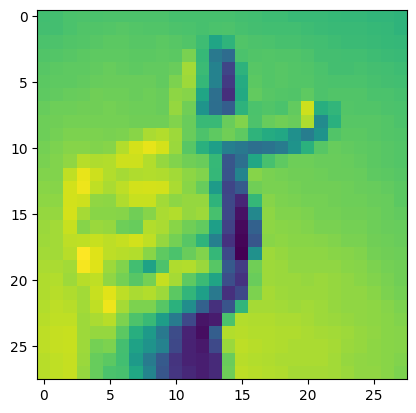

In [ ]:
plt.imshow(training_images[19])
print(training_labels[19])

In [ ]:
# Visualizing the shapes of the data
print(f"training images have shape : {training_images.shape}")
print(f"training labels have shape : {training_labels.shape}")
print(f"validation images have shape : {validation_images.shape}")
print(f"validation labels have shape : {validation_labels.shape}")

training images have shape : (27455, 28, 28)
training labels have shape : (27455,)
validation images have shape : (7172, 28, 28)
validation labels have shape : (7172,)


In [ ]:
# Expanding the dimensions of the training and validation set to make them (10000, 28, 28, 1)
training_images = np.expand_dims(training_images, axis=3)
validation_images = np.expand_dims(validation_images, axis=3)

In [ ]:
print(f"training images have shape : {training_images.shape}")

training images have shape : (27455, 28, 28, 1)


In [ ]:
print(f"validation images have shape : {validation_images.shape}")

validation images have shape : (7172, 28, 28, 1)


In [ ]:
# Creating an ImageDataGenerator for Image Augmentation
def img_generator(training_images, training_labels, validation_images, validation_labels):

    train_datagen = ImageDataGenerator(
                        rescale = 1./255,
                        rotation_range=40,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        fill_mode='nearest')

    train_generator = train_datagen.flow(x=training_images, y=training_labels, batch_size=32)

    valid_datagen = ImageDataGenerator(rescale=1./255)

    valid_generator = valid_datagen.flow(x=validation_images, y=validation_labels, batch_size=32)

    return train_generator, valid_generator

In [ ]:
# Testing the generator
train_generator, validation_generator = img_generator(training_images, training_labels,
                                                      validation_images, validation_labels)

print(f"Training generator images have shape : {train_generator.x.shape}")
print(f"Training generator labels have shape : {train_generator.y.shape}")
print(f"Validation generator images have shape : {validation_generator.x.shape}")
print(f"Validation generator labels have shape : {validation_generator.y.shape}")

Training generator images have shape : (27455, 28, 28, 1)
Training generator labels have shape : (27455,)
Validation generator images have shape : (7172, 28, 28, 1)
Validation generator labels have shape : (7172,)


## CNN Model

In [ ]:
# Creating the model
def CNN_model():

    CNN_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=((28, 28, 1))),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(26, activation='softmax')
    ])

    CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return CNN_model


In [ ]:
cnn_model = CNN_model()

In [ ]:
import time
start_time = time.time()
history = cnn_model.fit(train_generator, epochs = 20, validation_data = validation_generator)
end_time = time.time()

Epoch 1/20
858/858 [==============================] - 39s 43ms/step - loss: 2.6145 - accuracy: 0.2017 - val_loss: 1.6491 - val_accuracy: 0.4727
Epoch 2/20
858/858 [==============================] - 40s 47ms/step - loss: 1.8273 - accuracy: 0.4164 - val_loss: 1.2338 - val_accuracy: 0.5510
Epoch 3/20
858/858 [==============================] - 40s 46ms/step - loss: 1.4294 - accuracy: 0.5361 - val_loss: 0.8771 - val_accuracy: 0.6902
Epoch 4/20
858/858 [==============================] - 40s 47ms/step - loss: 1.1818 - accuracy: 0.6092 - val_loss: 0.6416 - val_accuracy: 0.7711
Epoch 5/20
858/858 [==============================] - 39s 46ms/step - loss: 0.9987 - accuracy: 0.6718 - val_loss: 0.4643 - val_accuracy: 0.8470
Epoch 6/20
858/858 [==============================] - 38s 44ms/step - loss: 0.8620 - accuracy: 0.7125 - val_loss: 0.4034 - val_accuracy: 0.8579
Epoch 7/20
858/858 [==============================] - 38s 44ms/step - loss: 0.7703 - accuracy: 0.7434 - val_loss: 0.3249 - val_accuracy:

In [ ]:
# Calculate and print the overall training time
training_time = (end_time - start_time)/60
print(f"Overall training time: {training_time} mins")

Overall training time: 13.394460229078929 mins


In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 512)               4

In [ ]:
# Evaluate the model on the validation set
test_loss, test_accuracy = cnn_model.evaluate(validation_generator)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


225/225 [==============================] - 2s 10ms/step - loss: 0.2084 - accuracy: 0.9216
Test Accuracy: 92.16%


In [ ]:
cnn_model.save('cnn_model.h5')

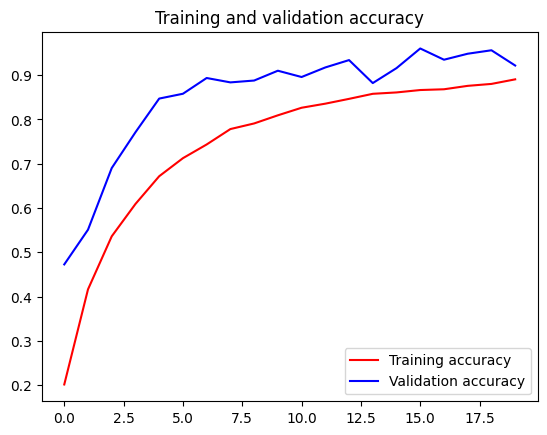

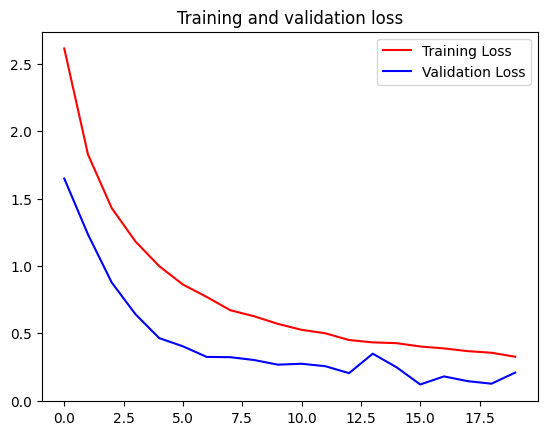

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

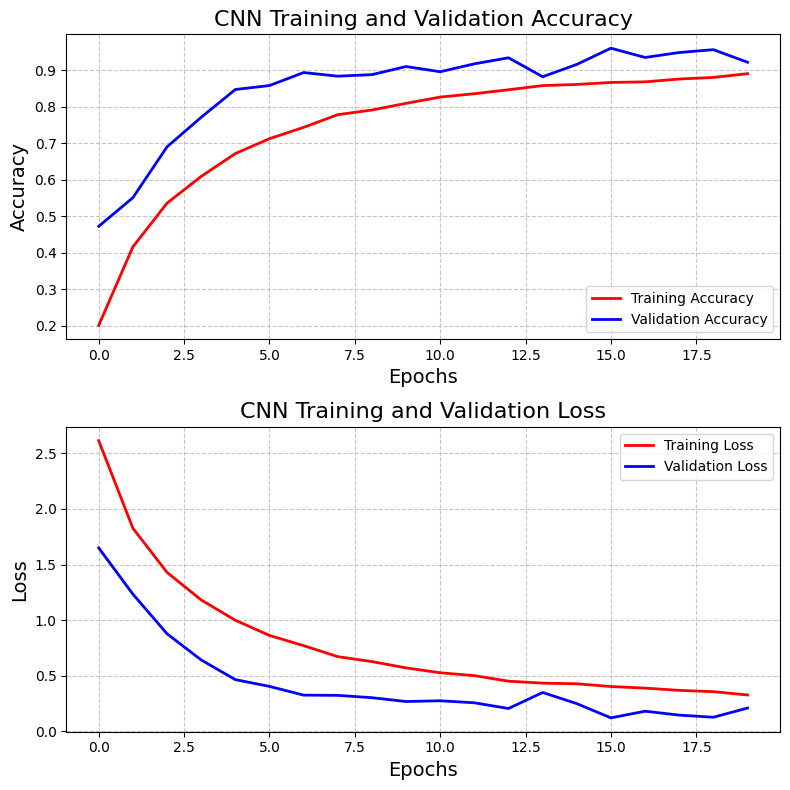

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and have its history (history)

# Plot the chart for accuracy and loss on both training and validation
plt.figure(figsize=(8, 8))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(epochs, acc, 'r-', label='Training Accuracy', linewidth=2)
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy', linewidth=2)
plt.title('CNN Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(epochs, loss, 'r-', label='Training Loss', linewidth=2)
plt.plot(epochs, val_loss, 'b-', label='Validation Loss', linewidth=2)
plt.title('CNN Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## LSTM Model

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model

In [ ]:
# Reshape the images to sequences for input to LSTM
sequence_length = 28  # assuming each row in the image as a time step
input_shape = (sequence_length, 28, 1)

# Define the model architecture
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)

    # Reshape the input for LSTM layer
    x = tf.keras.layers.Reshape((sequence_length, 28 * 1))(inputs)

    # LSTM layer with 128 units
    x = LSTM(128)(x)

    # Dense layers for further processing
    x = Dense(512, activation='relu')(x)

    # Output layer with 26 units (number of classes) and softmax activation
    outputs = Dense(26, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Reshape the training and validation images for LSTM
training_images_lstm = training_images.reshape((training_images.shape[0], sequence_length, 28, 1))
validation_images_lstm = validation_images.reshape((validation_images.shape[0], sequence_length, 28, 1))

In [ ]:
# Build and compile the LSTM model
lstm_model = build_lstm_model(input_shape)

In [ ]:
# Train the model
history_lstm = lstm_model.fit(training_images_lstm, training_labels, epochs=20,
                              validation_data=(validation_images_lstm, validation_labels))

Epoch 1/20
858/858 [==============================] - 49s 54ms/step - loss: 2.3651 - accuracy: 0.2680 - val_loss: 2.4245 - val_accuracy: 0.2584
Epoch 2/20
858/858 [==============================] - 43s 50ms/step - loss: 1.8563 - accuracy: 0.3995 - val_loss: 2.0313 - val_accuracy: 0.3437
Epoch 3/20
858/858 [==============================] - 42s 49ms/step - loss: 1.5363 - accuracy: 0.4905 - val_loss: 1.8761 - val_accuracy: 0.3943
Epoch 4/20
858/858 [==============================] - 40s 47ms/step - loss: 1.2945 - accuracy: 0.5708 - val_loss: 1.8391 - val_accuracy: 0.4162
Epoch 5/20
858/858 [==============================] - 41s 48ms/step - loss: 1.0672 - accuracy: 0.6457 - val_loss: 1.7488 - val_accuracy: 0.4626
Epoch 6/20
858/858 [==============================] - 43s 50ms/step - loss: 0.9087 - accuracy: 0.6937 - val_loss: 1.7571 - val_accuracy: 0.4955
Epoch 7/20
858/858 [==============================] - 45s 52ms/step - loss: 0.7413 - accuracy: 0.7517 - val_loss: 1.7601 - val_accuracy:

In [ ]:
# Evaluate the FNN model on the validation set
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(validation_images_lstm, validation_labels)

# Print the test accuracy for FNN
print(f'LSTM Test Accuracy: {test_accuracy_lstm * 100:.2f}%')

225/225 [==============================] - 3s 15ms/step - loss: 2.1465 - accuracy: 0.5740
LSTM Test Accuracy: 57.40%


##Feedforward Neural Network (FNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
# Reshape the images for DNN
flat_input_shape = (28 * 28,)  # Flatten the 28x28 images
training_images_fnn = training_images.reshape((training_images.shape[0], 28 * 28))
validation_images_fnn = validation_images.reshape((validation_images.shape[0], 28 * 28))

# Define the DNN model
def build_fnn_model(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(26, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Build and compile the FNN model
fnn_model = build_fnn_model(flat_input_shape)

In [ ]:
training_images_fnn.shape

(27455, 784)

In [ ]:
validation_images_fnn.shape

(7172, 784)

In [ ]:
# Display the model summary
fnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 26)                3354      
                                                                 
Total params: 569498 (2.17 MB)
Trainable params: 569498 (2.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
import time
start_time = time.time()
history_fnn = fnn_model.fit(training_images_fnn, training_labels, epochs=20,
                             validation_data=(validation_images_fnn, validation_labels))
end_time = time.time()

Epoch 1/20
858/858 [==============================] - 12s 13ms/step - loss: 8.5576 - accuracy: 0.1596 - val_loss: 2.8109 - val_accuracy: 0.1859
Epoch 2/20
858/858 [==============================] - 12s 14ms/step - loss: 2.3173 - accuracy: 0.3116 - val_loss: 2.3841 - val_accuracy: 0.2934
Epoch 3/20
858/858 [==============================] - 10s 12ms/step - loss: 1.7471 - accuracy: 0.4491 - val_loss: 2.0876 - val_accuracy: 0.3748
Epoch 4/20
858/858 [==============================] - 11s 13ms/step - loss: 1.2334 - accuracy: 0.5898 - val_loss: 1.5530 - val_accuracy: 0.5417
Epoch 5/20
858/858 [==============================] - 11s 13ms/step - loss: 0.9789 - accuracy: 0.6650 - val_loss: 1.3734 - val_accuracy: 0.6170
Epoch 6/20
858/858 [==============================] - 10s 12ms/step - loss: 0.7968 - accuracy: 0.7258 - val_loss: 1.6307 - val_accuracy: 0.5987
Epoch 7/20
858/858 [==============================] - 9s 11ms/step - loss: 0.6630 - accuracy: 0.7708 - val_loss: 1.5960 - val_accuracy: 

In [ ]:
# Calculate and print the overall training time
training_time = (end_time - start_time)/60
print(f"Overall training time: {training_time} mins")

Overall training time: 4.384536258379618 mins


In [ ]:
# Evaluate the FNN model on the validation set
test_loss_fnn, test_accuracy_fnn = fnn_model.evaluate(validation_images_fnn, validation_labels)

# Print the test accuracy for FNN
print(f'FNN Test Accuracy: {test_accuracy_fnn * 100:.2f}%')

225/225 [==============================] - 1s 5ms/step - loss: 1.6074 - accuracy: 0.7980
FNN Test Accuracy: 79.80%


In [ ]:
fnn_model.save('fnn_model.h5')

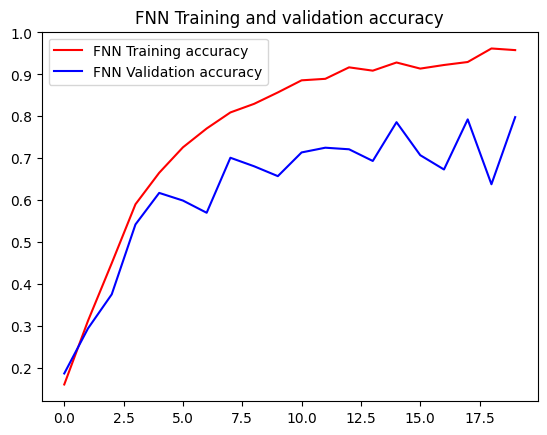

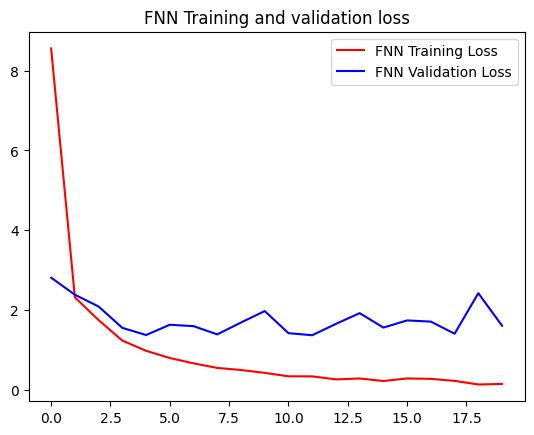

In [ ]:
# Assuming you have trained your FNN model and have its history (history_fnn)

# Plot the chart for accuracy and loss on both training and validation
acc_fnn = history_fnn.history['accuracy']
val_acc_fnn = history_fnn.history['val_accuracy']
loss_fnn = history_fnn.history['loss']
val_loss_fnn = history_fnn.history['val_loss']

epochs_fnn = range(len(acc_fnn))

plt.plot(epochs_fnn, acc_fnn, 'r', label='FNN Training accuracy')
plt.plot(epochs_fnn, val_acc_fnn, 'b', label='FNN Validation accuracy')
plt.title('FNN Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs_fnn, loss_fnn, 'r', label='FNN Training Loss')
plt.plot(epochs_fnn, val_loss_fnn, 'b', label='FNN Validation Loss')
plt.title('FNN Training and validation loss')
plt.legend()

plt.show()


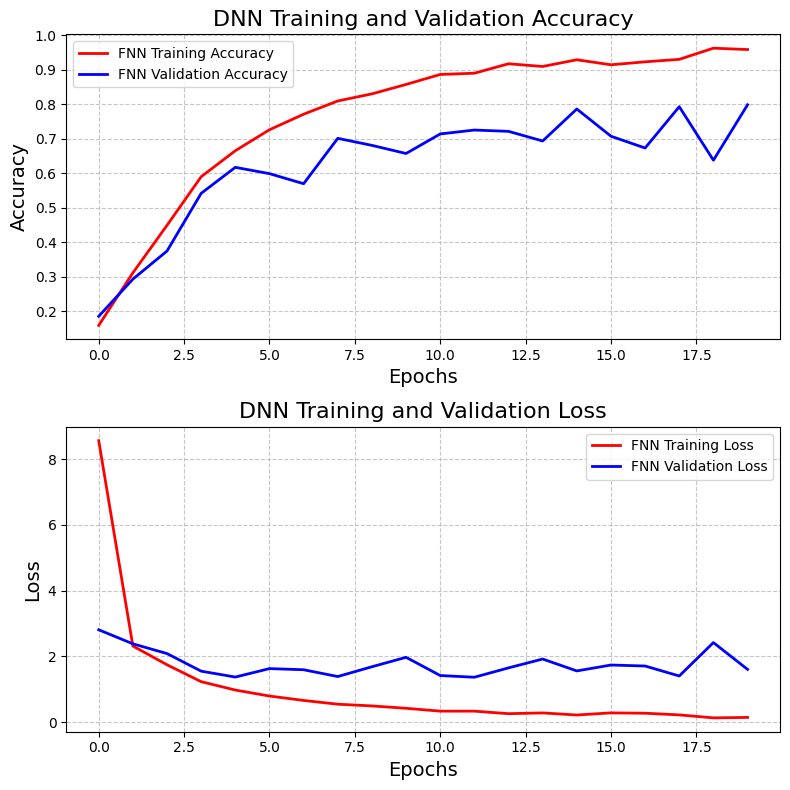

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your FNN model and have its history (history_fnn)

# Plot the chart for accuracy and loss on both training and validation
plt.figure(figsize=(8, 8))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(epochs_fnn, acc_fnn, 'r-', label='FNN Training Accuracy', linewidth=2)
plt.plot(epochs_fnn, val_acc_fnn, 'b-', label='FNN Validation Accuracy', linewidth=2)
plt.title('DNN Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(epochs_fnn, loss_fnn, 'r-', label='FNN Training Loss', linewidth=2)
plt.plot(epochs_fnn, val_loss_fnn, 'b-', label='FNN Validation Loss', linewidth=2)
plt.title('DNN Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


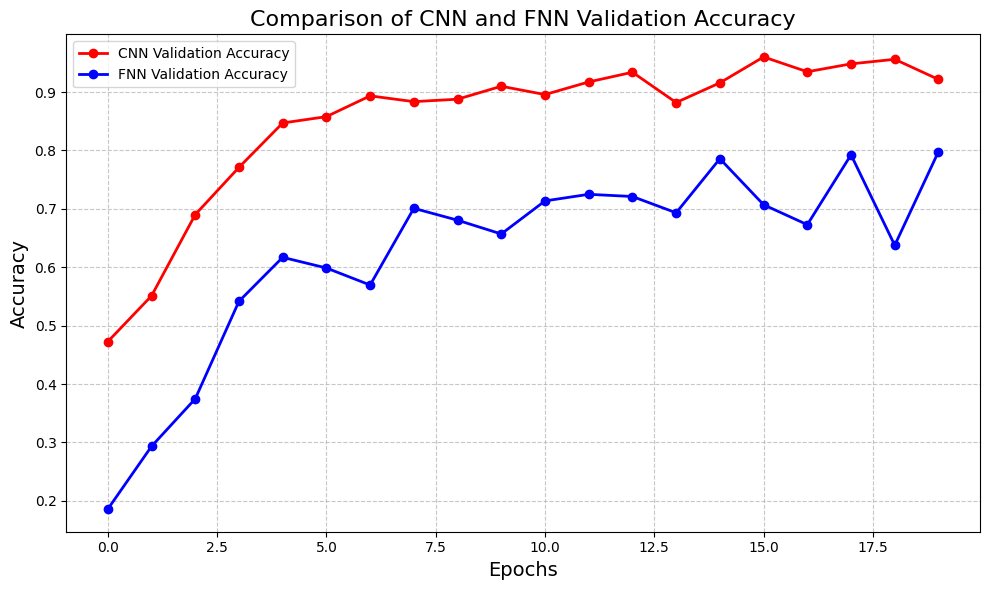

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained both CNN and FNN models and have their histories (history and history_fnn)

# Plot the chart for validation accuracy for both models
plt.figure(figsize=(10, 6))

plt.plot(epochs, val_acc, 'r-', label='CNN Validation Accuracy', linewidth=2, marker='o')
plt.plot(epochs_fnn, val_acc_fnn, 'b-', label='FNN Validation Accuracy', linewidth=2, marker='o')

plt.title('Comparison of CNN and FNN Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Residual Networks (ResNet)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense

In [ ]:
# Define the residual block
def residual_block(x, filters, kernel_size=3, strides=1):
    y = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    y = BatchNormalization()(y)
    y = ReLU()(y)
    y = Conv2D(filters, kernel_size=kernel_size, padding='same')(y)
    y = BatchNormalization()(y)
    # Shortcut connection
    if strides != 1 or x.shape[-1] != filters:
        x = Conv2D(filters, kernel_size=1, strides=strides, padding='same')(x)
        x = BatchNormalization()(x)
    # Add the shortcut value to the output
    y = Add()([x, y])
    y = ReLU()(y)
    return y
# Build the ResNet model
def build_resnet_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    # Initial convolution layer
    x = Conv2D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=2)
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=2)
    x = residual_block(x, filters=256)
    # Global average pooling and dense layer
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Reshape the training and validation images for ResNet
training_images_resnet = np.expand_dims(training_images, axis=3)
validation_images_resnet = np.expand_dims(validation_images, axis=3)

# Build and compile the ResNet model
resnet_model = build_resnet_model((28, 28, 1), 26)

In [ ]:
training_images_resnet.shape

(27455, 28, 28, 1, 1)

In [ ]:
# Reshape the training and validation images for ResNet
training_images_resnet = np.expand_dims(training_images, axis=3)
validation_images_resnet = np.expand_dims(validation_images, axis=3)

In [ ]:
training_images_resnet.shape

(27455, 28, 28, 1, 1)

In [ ]:
# Display the model summary
resnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_46 (Conv2D)          (None, 14, 14, 64)           3200      ['input_3[0][0]']             
                                                                                                  
 batch_normalization_30 (Ba  (None, 14, 14, 64)           256       ['conv2d_46[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_26 (ReLU)             (None, 14, 14, 64)           0         ['batch_normalization_30

In [ ]:
# Train the model
start_time = time.time()
history_resnet = resnet_model.fit(training_images_resnet, training_labels, epochs=5,
                                  validation_data=(validation_images_resnet, validation_labels))
end_time = time.time()

Epoch 1/5
858/858 [==============================] - 535s 616ms/step - loss: 0.2150 - accuracy: 0.9346 - val_loss: 1.0031 - val_accuracy: 0.7724
Epoch 2/5
858/858 [==============================] - 542s 631ms/step - loss: 0.0189 - accuracy: 0.9948 - val_loss: 0.2345 - val_accuracy: 0.9463
Epoch 3/5
858/858 [==============================] - 546s 636ms/step - loss: 0.0207 - accuracy: 0.9948 - val_loss: 0.2216 - val_accuracy: 0.9501
Epoch 4/5
858/858 [==============================] - 536s 625ms/step - loss: 1.3093e-04 - accuracy: 1.0000 - val_loss: 0.2307 - val_accuracy: 0.9479
Epoch 5/5
858/858 [==============================] - 542s 632ms/step - loss: 6.6441e-05 - accuracy: 1.0000 - val_loss: 0.2294 - val_accuracy: 0.9499


In [ ]:
# Calculate and print the overall training time
training_time = (end_time - start_time)/60
print(f"Overall training time: {training_time} mins")

Overall training time: 45.48046959638596 mins


In [ ]:
# Evaluate the FNN model on the validation set
test_loss_resnet, test_accuracy_resnet = resnet_model.evaluate(validation_images_resnet, validation_labels)

# Print the test accuracy for FNN
print(f'Resnet Test Accuracy: {test_accuracy_resnet * 100:.2f}%')

225/225 [==============================] - 31s 135ms/step - loss: 0.2294 - accuracy: 0.9499
Resnet Test Accuracy: 94.99%


In [ ]:
resnet_model.save('resnet_model.h5')

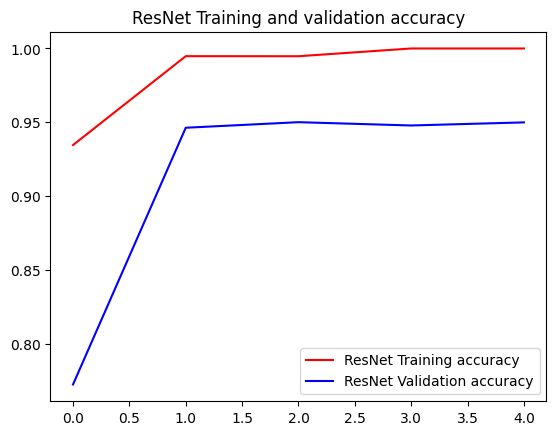

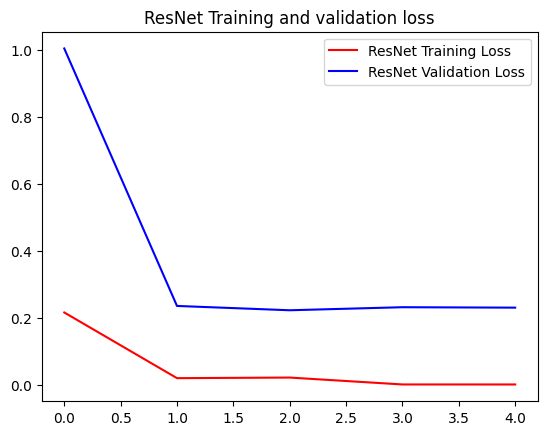

In [ ]:
# Assuming you have trained your ResNet model and have its history (history_resnet)

# Plot the chart for accuracy and loss on both training and validation
acc_resnet = history_resnet.history['accuracy']
val_acc_resnet = history_resnet.history['val_accuracy']
loss_resnet = history_resnet.history['loss']
val_loss_resnet = history_resnet.history['val_loss']

epochs_resnet = range(len(acc_resnet))

plt.plot(epochs_resnet, acc_resnet, 'r', label='ResNet Training accuracy')
plt.plot(epochs_resnet, val_acc_resnet, 'b', label='ResNet Validation accuracy')
plt.title('ResNet Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs_resnet, loss_resnet, 'r', label='ResNet Training Loss')
plt.plot(epochs_resnet, val_loss_resnet, 'b', label='ResNet Validation Loss')
plt.title('ResNet Training and validation loss')
plt.legend()

plt.show()

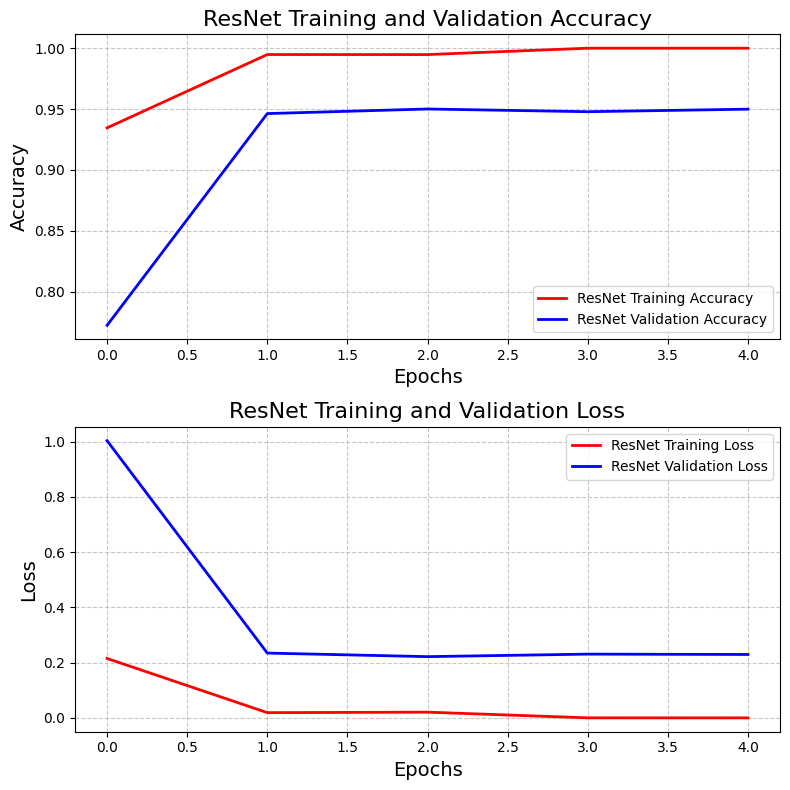

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your ResNet model and have its history (history_resnet)

# Plot the chart for accuracy and loss on both training and validation
plt.figure(figsize=(8, 8))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(epochs_resnet, acc_resnet, 'r-', label='ResNet Training Accuracy', linewidth=2)
plt.plot(epochs_resnet, val_acc_resnet, 'b-', label='ResNet Validation Accuracy', linewidth=2)
plt.title('ResNet Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(epochs_resnet, loss_resnet, 'r-', label='ResNet Training Loss', linewidth=2)
plt.plot(epochs_resnet, val_loss_resnet, 'b-', label='ResNet Validation Loss', linewidth=2)
plt.title('ResNet Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Ensemble Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, concatenate, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Ensemble Model
def build_ensemble_model(input_shape, num_classes):
    input_layer = Input(shape=input_shape)

    # FNN branch
    fnn_branch = Sequential(name='fnn_branch')
    fnn_branch.add(Flatten(input_shape=input_shape))
    fnn_branch.add(Dense(512, activation='relu'))
    fnn_branch.add(Dense(256, activation='relu'))
    fnn_branch.add(Dense(num_classes, activation='softmax'))

    # CNN branch
    cnn_branch = cnn_model

    # ResNet branch
    resnet_branch = resnet_model

    # Combine the outputs of the three models
    merged = concatenate([fnn_branch(input_layer), cnn_branch(input_layer), resnet_branch(input_layer)])

    # Dense layer for final prediction
    merged = Dense(128, activation='relu')(merged)
    output_layer = Dense(num_classes, activation='softmax')(merged)

    ensemble_model = Model(inputs=input_layer, outputs=output_layer)
    ensemble_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return ensemble_model

In [ ]:
# Build the ensemble model
input_shape = (28, 28, 1)  # Update with the actual input shape of your data
num_classes = 26  # Update with the actual number of classes
ensemble_model = build_ensemble_model(input_shape, num_classes)

# Display the ensemble model summary
ensemble_model.summary()

# Evaluate the ensemble model on the test data
test_loss, test_accuracy = ensemble_model.evaluate(validation_images, validation_labels)
print(f'Ensemble Model Test Accuracy: {test_accuracy * 100:.2f}%')

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 fnn_branch (Sequential)     (None, 26)                   539930    ['input_3[0][0]']             
                                                                                                  
 sequential_3 (Sequential)   (None, 26)                   433018    ['input_3[0][0]']             
                                                                                                  
 model_1 (Functional)        (None, 26)                   2789914   ['input_3[0][0]']             
                                                                                            

## Ensemble for CNN and ResNet

In [ ]:
from tensorflow.keras.layers import concatenate

# Create an ensemble model with CNN and ResNet
def ensemble_modelv3(cnn_model, resnet_model):
    # Remove the output layer of the CNN model
    cnn_output_layer = cnn_model.layers[-2].output

    # Remove the output layer of the ResNet model
    resnet_output_layer = resnet_model.layers[-2].output

    # Concatenate the output of the CNN and ResNet models
    merged_layer = concatenate([cnn_output_layer, resnet_output_layer])

    # Add a dense layer for final classification
    final_output = Dense(26, activation='softmax')(merged_layer)

    # Create the ensemble model
    ensemble = tf.keras.models.Model(inputs=[cnn_model.input, resnet_model.input], outputs=final_output)

    # Compile the ensemble model
    ensemble.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return ensemble

In [ ]:
# Create an ensemble model with CNN and ResNet
ensemble_modelv3 = ensemble_modelv3(cnn_model, resnet_model)

# Train the ensemble model
history_ensemble = ensemble_modelv3.fit(
    [train_generator.x, training_images_resnet],
    training_labels,
    epochs=3,
    validation_data=([validation_generator.x, validation_images_resnet], validation_labels)
)

Epoch 1/3
858/858 [==============================] - 671s 668ms/step - loss: 0.0584 - accuracy: 0.9881 - val_loss: 0.1037 - val_accuracy: 0.9615
Epoch 2/3
858/858 [==============================] - 572s 666ms/step - loss: 0.0167 - accuracy: 0.9954 - val_loss: 0.1603 - val_accuracy: 0.9582
Epoch 3/3
858/858 [==============================] - 559s 651ms/step - loss: 1.9039e-04 - accuracy: 1.0000 - val_loss: 0.1484 - val_accuracy: 0.9607


In [ ]:
# Evaluate the ensemble model on the validation set
test_loss_ensemble, test_accuracy_ensemble = ensemble_modelv3.evaluate(
    [validation_generator.x, validation_images_resnet],
    validation_labels
)

# Print the test accuracy for the ensemble model
print(f'Ensemble Model Test Accuracy: {test_accuracy_ensemble * 100:.2f}%')


225/225 [==============================] - 53s 236ms/step - loss: 0.1484 - accuracy: 0.9607
Ensemble Model Test Accuracy: 96.07%


In [ ]:
ensemble_modelv3.save('ensemble_modelv3.h5')

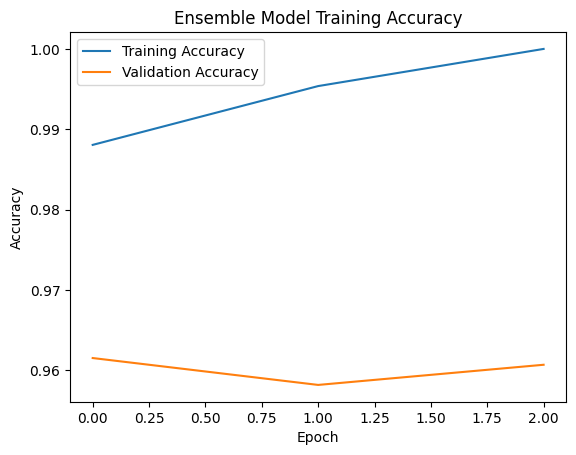

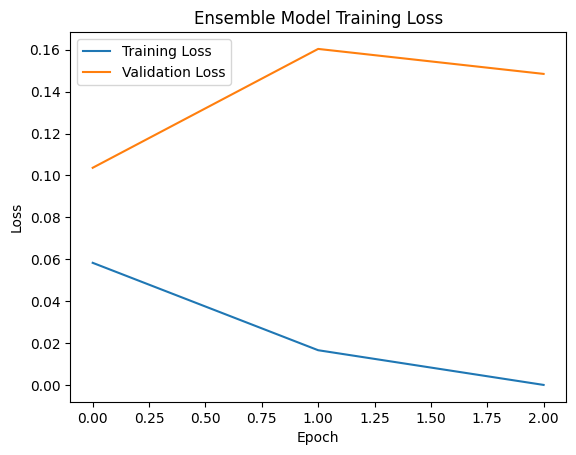

In [ ]:
# Plot training history for accuracy
plt.plot(history_ensemble.history['accuracy'], label='Training Accuracy')
plt.plot(history_ensemble.history['val_accuracy'], label='Validation Accuracy')
plt.title('Ensemble Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training history for loss
plt.plot(history_ensemble.history['loss'], label='Training Loss')
plt.plot(history_ensemble.history['val_loss'], label='Validation Loss')
plt.title('Ensemble Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Vggnet Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def VGGNet_model(input_shape=(28, 28, 1)):
    model = Sequential([
        # First block
        Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        # Second block
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        # Third block
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        # Classifier
        Flatten(),
        Dense(512, activation='relu'),
        Dense(216, activation='relu'),
        Dense(26, activation='softmax')  # Assuming 26 classes as per your notebook
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create the VGGNet model
vggnet_model = VGGNet_model()
vggnet_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_62 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_63 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_64 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                

In [ ]:
history = vggnet_model.fit(training_images, training_labels,
                           epochs=5,  # You can adjust the number of epochs
                           batch_size=32,
                           validation_data=(validation_images, validation_labels))


Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
# Create the VGGNet model
vggnet_model = VGGNet_model()

# Reshape the training and validation images for VGGNet
training_images_vggnet = np.expand_dims(training_images, axis=3)
validation_images_vggnet = np.expand_dims(validation_images, axis=3)

# Train the VGGNet model
history_vggnet = vggnet_model.fit(training_images_vggnet, training_labels,
                                  epochs=5,  # You can adjust the number of epochs
                                  batch_size=32,
                                  validation_data=(validation_images_vggnet, validation_labels))


Epoch 1/5
858/858 [==============================] - 557s 648ms/step - loss: 0.8686 - accuracy: 0.7372 - val_loss: 0.4791 - val_accuracy: 0.8826
Epoch 2/5
858/858 [==============================] - 527s 614ms/step - loss: 0.0557 - accuracy: 0.9835 - val_loss: 0.2581 - val_accuracy: 0.9366
Epoch 3/5
858/858 [==============================] - 530s 617ms/step - loss: 0.0390 - accuracy: 0.9885 - val_loss: 0.2018 - val_accuracy: 0.9492
Epoch 4/5
858/858 [==============================] - 532s 621ms/step - loss: 2.7415e-04 - accuracy: 0.9999 - val_loss: 0.1808 - val_accuracy: 0.9619
Epoch 5/5
858/858 [==============================] - 552s 644ms/step - loss: 5.0331e-06 - accuracy: 1.0000 - val_loss: 0.1788 - val_accuracy: 0.9621


In [ ]:
# Reshape the training and validation images for VGGNet
training_images_vggnet = np.expand_dims(training_images, axis=3)
validation_images_vggnet = np.expand_dims(validation_images, axis=3)

In [ ]:
training_images_vggnet.shape

(27455, 28, 28, 1, 1)

In [ ]:
# Evaluating the model on the validation set
val_loss, val_accuracy = vggnet_model.evaluate(validation_images, validation_labels)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Optionally, save the trained model
vggnet_model.save('vggnet_modelv2.h5')

225/225 [==============================] - 37s 163ms/step - loss: 0.1788 - accuracy: 0.9621
Validation Loss: 0.17883238196372986
Validation Accuracy: 0.9620747566223145


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


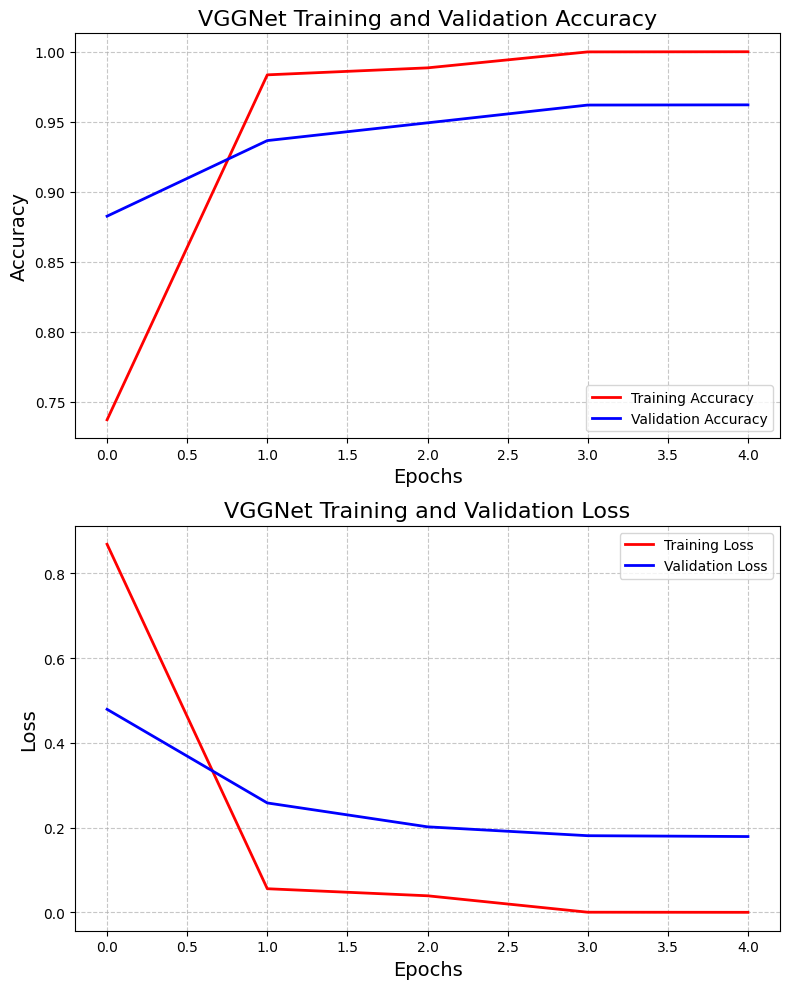

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your VGGNet model and have its history (history_vggnet)

# Plot the chart for accuracy and loss on both training and validation
acc_vggnet = history_vggnet.history['accuracy']
val_acc_vggnet = history_vggnet.history['val_accuracy']
loss_vggnet = history_vggnet.history['loss']
val_loss_vggnet = history_vggnet.history['val_loss']

epochs_vggnet = range(len(acc_vggnet))

# Plotting accuracy
plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_vggnet, acc_vggnet, 'r-', label='Training Accuracy', linewidth=2)
plt.plot(epochs_vggnet, val_acc_vggnet, 'b-', label='Validation Accuracy', linewidth=2)
plt.title('VGGNet Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plotting loss
plt.subplot(2, 1, 2)
plt.plot(epochs_vggnet, loss_vggnet, 'r-', label='Training Loss', linewidth=2)
plt.plot(epochs_vggnet, val_loss_vggnet, 'b-', label='Validation Loss', linewidth=2)
plt.title('VGGNet Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Ensemble for CNN, ResNet, VggNet

In [ ]:
from tensorflow.keras.layers import Input

# Function to create the ensemble model with CNN, ResNet, and VGGNet
def ensemble_model_v4(cnn_model, resnet_model, vggnet_model):
    # Removing the output layer of the CNN model
    cnn_output_layer = cnn_model.layers[-2].output
    # Removing the output layer of the ResNet model
    resnet_output_layer = resnet_model.layers[-2].output
    # Removing the output layer of the VGGNet model
    vggnet_output_layer = vggnet_model.layers[-2].output
    # Concatenating the output of the CNN, ResNet, and VGGNet models
    merged_layer = concatenate([cnn_output_layer, resnet_output_layer, vggnet_output_layer])
    # Adding a dense layer for final classification
    final_output = Dense(26, activation='softmax')(merged_layer)
    # Creating the ensemble model
    ensemble = tf.keras.models.Model(inputs=[cnn_model.input, resnet_model.input, vggnet_model.input], outputs=final_output)
    # Compiling the ensemble model
    ensemble.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return ensemble

In [ ]:
# Create and train the ensemble model with CNN, ResNet, and VGGNet
ensemble_model_v4 = ensemble_model_v4(cnn_model, resnet_model, vggnet_model)

# Train the ensemble model
history_ensemble = ensemble_model_v4.fit(
    [train_generator.x, training_images_resnet, training_images],
    training_labels,
    epochs=5,  # You can adjust the number of epochs
    validation_data=([validation_generator.x, validation_images_resnet, validation_images_vggnet], validation_labels)
)


Epoch 1/5
858/858 [==============================] - 1098s 1s/step - loss: 0.1351 - accuracy: 0.9832 - val_loss: 0.1822 - val_accuracy: 0.9469
Epoch 2/5
858/858 [==============================] - 1080s 1s/step - loss: 1.3602e-05 - accuracy: 1.0000 - val_loss: 0.1775 - val_accuracy: 0.9594
Epoch 3/5
858/858 [==============================] - 1095s 1s/step - loss: 3.2998e-06 - accuracy: 1.0000 - val_loss: 0.1923 - val_accuracy: 0.9576
Epoch 4/5
858/858 [==============================] - 1070s 1s/step - loss: 0.0701 - accuracy: 0.9818 - val_loss: 0.1774 - val_accuracy: 0.9417
Epoch 5/5
858/858 [==============================] - 1065s 1s/step - loss: 4.2344e-04 - accuracy: 0.9999 - val_loss: 0.1611 - val_accuracy: 0.9658


In [ ]:
# Evaluate the ensemble model on the validation set
test_loss_ensemble, test_accuracy_ensemble = ensemble_model_v4.evaluate(
    [validation_generator.x, validation_images_resnet, validation_images_vggnet],
    validation_labels
)

# Print the test accuracy for the ensemble model
print(f'Ensemble Model Test Accuracy: {test_accuracy_ensemble * 100:.2f}%')

AttributeError: ignored

In [ ]:
ensemble_model_v4.save('ensemble_model_v4.h5')

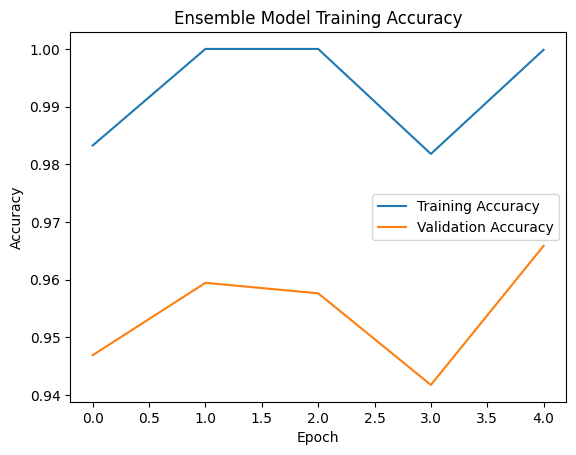

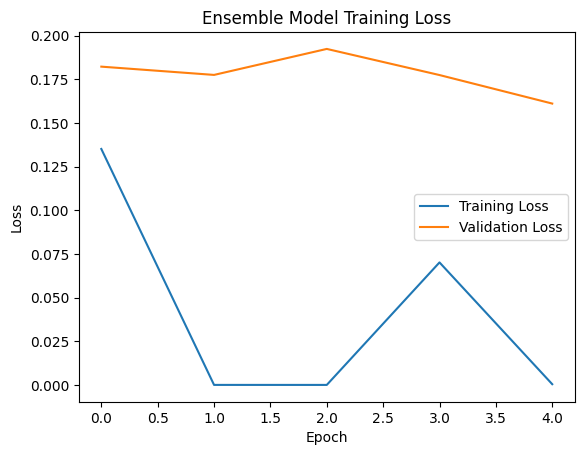

In [ ]:
# Plot training history for accuracy
plt.plot(history_ensemble.history['accuracy'], label='Training Accuracy')
plt.plot(history_ensemble.history['val_accuracy'], label='Validation Accuracy')
plt.title('Ensemble Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training history for loss
plt.plot(history_ensemble.history['loss'], label='Training Loss')
plt.plot(history_ensemble.history['val_loss'], label='Validation Loss')
plt.title('Ensemble Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf

model_path = '/content/ensemble_model_v4.h5'

# Load the saved model
ensemble_model_v4 = tf.keras.models.load_model(model_path)

In [ ]:
# Evaluate the ensemble model on the validation set
test_loss_ensemble, test_accuracy_ensemble = ensemble_model_v4.evaluate(
    [validation_generator.x, validation_images_resnet, validation_images_vggnet],
    validation_labels
)

# Print the test accuracy for the ensemble model
print(f'Ensemble Model Test Accuracy: {test_accuracy_ensemble * 100:.2f}%')

225/225 [==============================] - 66s 292ms/step - loss: 0.1611 - accuracy: 0.9658
Ensemble Model Test Accuracy: 96.58%


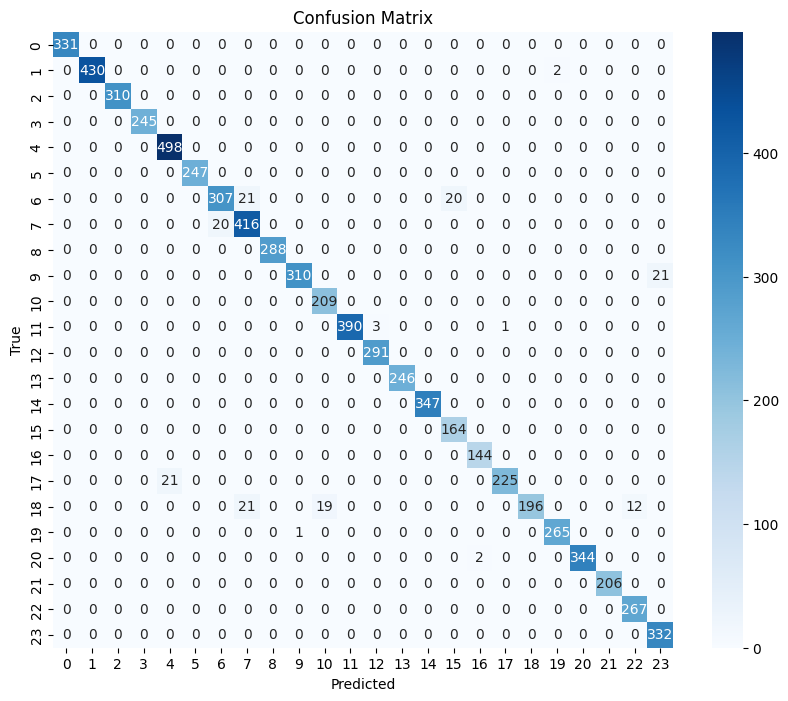

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Use the ensemble model to predict labels
predictions = ensemble_model_v4.predict([validation_generator.x, validation_images_resnet, validation_images_vggnet])
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(validation_labels, predicted_labels)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(24), yticklabels=np.arange(24))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Assuming `validation_data` is your validation dataset
# Use the ensemble model to predict labels
predictions = ensemble_model_v4.predict([validation_generator.x, validation_images_resnet, validation_images_vggnet])
predicted_labels = np.argmax(predictions, axis=1)

# Generate the classification report
class_report = classification_report(validation_labels, predicted_labels)

# Print the classification report
print("Classification Report:\n", class_report)

225/225 [==============================] - 71s 312ms/step
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       331
         1.0       1.00      1.00      1.00       432
         2.0       1.00      1.00      1.00       310
         3.0       1.00      1.00      1.00       245
         4.0       0.96      1.00      0.98       498
         5.0       1.00      1.00      1.00       247
         6.0       0.94      0.88      0.91       348
         7.0       0.91      0.95      0.93       436
         8.0       1.00      1.00      1.00       288
        10.0       1.00      0.94      0.97       331
        11.0       0.92      1.00      0.96       209
        12.0       1.00      0.99      0.99       394
        13.0       0.99      1.00      0.99       291
        14.0       1.00      1.00      1.00       246
        15.0       1.00      1.00      1.00       347
        16.0       0.89      1.00      0.94       164

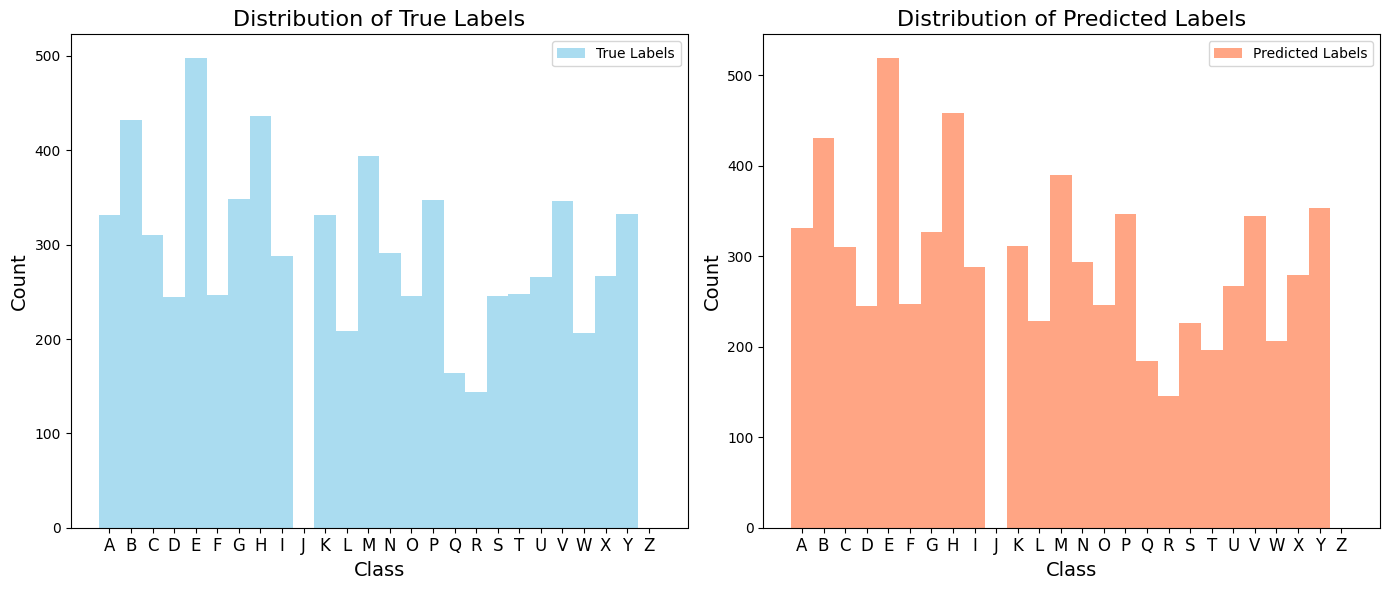

In [ ]:
import string

# Generate a list of uppercase letters corresponding to the number of classes
class_labels = list(string.ascii_uppercase[:n_classes])

plt.figure(figsize=(14, 6))

# Plot true labels distribution
plt.subplot(1, 2, 1)
plt.hist(validation_labels, bins=np.arange(n_classes + 1) - 0.5, alpha=0.7, color='skyblue', label='True Labels')
plt.xticks(np.arange(n_classes), class_labels,fontsize=12)  # Use class_labels on x-axis
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of True Labels', fontsize=16)
plt.legend()

# Plot predicted labels distribution
plt.subplot(1, 2, 2)
plt.hist(predicted_labels, bins=np.arange(n_classes + 1) - 0.5, alpha=0.7, color='coral', label='Predicted Labels')
plt.xticks(np.arange(n_classes), class_labels, fontsize=12)  # Use class_labels on x-axis
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Predicted Labels', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()


## Test

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [ ]:
# Creating a Fully Connected Neural Network (FNN) model
def FNN_model(input_shape=(28, 28, 1)):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu'),
        Dense(26, activation='softmax')
    ])

    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=[SparseCategoricalAccuracy()])

    return model

# Creating an ImageDataGenerator for Image Augmentation for FNN model
def img_generator_for_fnn(images, labels):
    datagen = ImageDataGenerator(rescale=1./255)

    generator = datagen.flow(x=images, y=labels, batch_size=32)

    return generator

In [ ]:
# Generating data for FNN model
train_generator_fnn = img_generator_for_fnn(training_images, training_labels)
validation_generator_fnn = img_generator_for_fnn(validation_images, validation_labels)

In [ ]:
# Creating and training FNN model
fnn_model = FNN_model()
history_fnn = fnn_model.fit(train_generator_fnn, epochs=10, validation_data=validation_generator_fnn)

Epoch 1/10
858/858 [==============================] - 11s 13ms/step - loss: 1.7651 - sparse_categorical_accuracy: 0.4758 - val_loss: 1.4092 - val_sparse_categorical_accuracy: 0.5712
Epoch 2/10
858/858 [==============================] - 11s 12ms/step - loss: 0.9048 - sparse_categorical_accuracy: 0.7272 - val_loss: 1.2719 - val_sparse_categorical_accuracy: 0.5934
Epoch 3/10
858/858 [==============================] - 10s 11ms/step - loss: 0.6080 - sparse_categorical_accuracy: 0.8171 - val_loss: 1.1005 - val_sparse_categorical_accuracy: 0.6528
Epoch 4/10
858/858 [==============================] - 11s 12ms/step - loss: 0.4205 - sparse_categorical_accuracy: 0.8772 - val_loss: 0.9135 - val_sparse_categorical_accuracy: 0.7177
Epoch 5/10
858/858 [==============================] - 9s 11ms/step - loss: 0.2939 - sparse_categorical_accuracy: 0.9177 - val_loss: 1.0507 - val_sparse_categorical_accuracy: 0.6923
Epoch 6/10
858/858 [==============================] - 10s 12ms/step - loss: 0.2151 - sparse

In [ ]:
# Evaluate the FNN model on the validation set
test_loss_fnn, test_accuracy_fnn = fnn_model.evaluate(validation_generator_fnn)

# Print the test accuracy for FNN model
print(f'FNN Test Accuracy: {test_accuracy_fnn * 100:.2f}%')

225/225 [==============================] - 2s 7ms/step - loss: 1.0663 - sparse_categorical_accuracy: 0.7298
FNN Test Accuracy: 72.98%


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate, Dropout
from tensorflow.keras.regularizers import l2

# Create an ensemble model with CNN and FNN
def ensemble_model(cnn_model, fnn_model):
    # Remove the output layer of the CNN model
    cnn_output_layer = cnn_model.layers[-2].output

    # Remove the first layer (Flatten) from the FNN model
    fnn_input_layer = fnn_model.layers[1].output

    # Concatenate the output of the CNN model and the input of the FNN model
    merged_layer = concatenate([cnn_output_layer, fnn_input_layer])

    # Add dropout layer for regularization (increased dropout rate)
    merged_layer = Dropout(0.7)(merged_layer)

    # Add a dense layer with L2 regularization for final classification
    final_output = Dense(26, activation='softmax', kernel_regularizer=l2(0.01))(merged_layer)

    # Create the ensemble model
    ensemble = Model(inputs=[cnn_model.input, fnn_model.input], outputs=final_output)

    # Compile the ensemble model
    ensemble.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return ensemble


In [ ]:
# Create an ensemble model with CNN and FNN
ensemble_model = ensemble_model(cnn_model, fnn_model)

# Train the ensemble model
history_ensemble = ensemble_model.fit(
    [train_generator.x, train_generator_fnn.x],
    train_generator.y,
    epochs=20,
    validation_data=([validation_generator.x, validation_generator_fnn.x], validation_generator.y)
)

Epoch 1/20
858/858 [==============================] - 36s 41ms/step - loss: 5.5702 - accuracy: 0.0630 - val_loss: 3.3029 - val_accuracy: 0.0332
Epoch 2/20
858/858 [==============================] - 36s 42ms/step - loss: 3.2420 - accuracy: 0.0574 - val_loss: 3.2359 - val_accuracy: 0.0276
Epoch 3/20
858/858 [==============================] - 35s 41ms/step - loss: 3.2184 - accuracy: 0.0561 - val_loss: 3.2281 - val_accuracy: 0.0268
Epoch 4/20
161/858 [====>.........................] - ETA: 27s - loss: 3.2075 - accuracy: 0.0545

KeyboardInterrupt: ignored

In [ ]:
# Evaluate the ensemble model on the validation set
test_loss_ensemble, test_accuracy_ensemble = ensemble_model.evaluate([validation_generator.x, validation_generator_fnn.x], validation_generator.y)

# Print the test accuracy for the ensemble model
print(f'Ensemble Model Test Accuracy: {test_accuracy_ensemble * 100:.2f}%')

225/225 [==============================] - 1s 5ms/step - loss: 89.7203 - accuracy: 0.9548
Ensemble Model Test Accuracy: 95.48%


In [ ]:
from tensorflow.keras.layers import BatchNormalization

# Updated FNN model
def FNN_model_updated(input_shape=(28, 28, 1)):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dense(26, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=[SparseCategoricalAccuracy()])

    return model

# Updated data generator function
def img_generator_for_fnn_updated(images, labels):
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    generator = datagen.flow(x=images, y=labels, batch_size=32)

    return generator

In [ ]:
# Generating data for the updated FNN model
train_generator_fnn_updated = img_generator_for_fnn_updated(training_images, training_labels)
validation_generator_fnn_updated = img_generator_for_fnn_updated(validation_images, validation_labels)

In [ ]:
# Creating and training the updated FNN model
fnn_model_updated = FNN_model_updated()
history_fnn_updated = fnn_model_updated.fit(train_generator_fnn_updated, epochs=50, validation_data=validation_generator_fnn_updated)

Epoch 1/50
858/858 [==============================] - 30s 33ms/step - loss: 2.7970 - sparse_categorical_accuracy: 0.1727 - val_loss: 3.6852 - val_sparse_categorical_accuracy: 0.0998
Epoch 2/50
858/858 [==============================] - 27s 32ms/step - loss: 2.5097 - sparse_categorical_accuracy: 0.2259 - val_loss: 3.4812 - val_sparse_categorical_accuracy: 0.0998
Epoch 3/50
858/858 [==============================] - 26s 31ms/step - loss: 2.3640 - sparse_categorical_accuracy: 0.2693 - val_loss: 2.8358 - val_sparse_categorical_accuracy: 0.1866
Epoch 4/50
858/858 [==============================] - 26s 31ms/step - loss: 2.2620 - sparse_categorical_accuracy: 0.2991 - val_loss: 2.9475 - val_sparse_categorical_accuracy: 0.1769
Epoch 5/50
858/858 [==============================] - 26s 31ms/step - loss: 2.1758 - sparse_categorical_accuracy: 0.3187 - val_loss: 3.2850 - val_sparse_categorical_accuracy: 0.1825
Epoch 6/50
858/858 [==============================] - 26s 30ms/step - loss: 2.0794 - spars

KeyboardInterrupt: ignored

In [ ]:
# Evaluate the updated FNN model on the validation set
test_loss_fnn_updated, test_accuracy_fnn_updated = fnn_model_updated.evaluate(validation_generator_fnn_updated)

# Print the test accuracy for the updated FNN model
print(f'Updated FNN Test Accuracy: {test_accuracy_fnn_updated * 100:.2f}%')

### Visulization

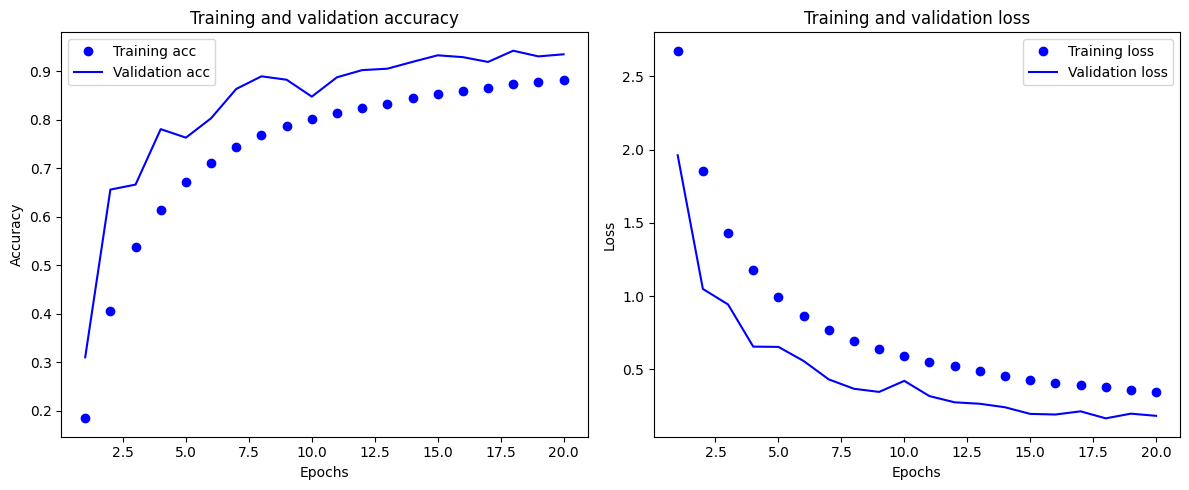

In [ ]:
epochs = range(1, len(acc) + 1)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()